In [10]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import seaborn as sns  # Para plotagem de gráficos avançados
from sklearn.preprocessing import LabelEncoder
from itertools import cycle


# Importando as métricas e funções de avaliação do scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Importando os modelos de machine learning do scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.neighbors import KNeighborsClassifier  # K-Vizinhos Mais Próximos
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter


In [2]:
# Define o número máximo de colunas e a largura máxima das colunas para None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Carrega os dados de um arquivo CSV em um DataFrame.
var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Datasets\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_18544\1705905082.py:2: DtypeWarning: Columns (15,18,20,23,53,59,61,63,72,74,79,91,93,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Datasets\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')


# Análise Exploratória

In [6]:
var_dfPrincipal.shape

(277304, 190)

In [5]:
#Exibe as 5 primeiras linhas
var_dfPrincipal.head()

DT_NOTIFIC  SEM_NOT  DT_SIN_PRI  SEM_PRI SG_UF_NOT           ID_REGIONA  \
0  08/02/2023        6  23/01/2023        4        RS              014 CRS   
1  27/02/2023        9  25/02/2023        8        PR   02RS METROPOLITANA   
2  17/03/2023       11  12/03/2023       11        SP     GVE XVI BOTUCATU   
3  21/03/2023       12  18/03/2023       11        PR        17RS LONDRINA   
4  29/03/2023       13  26/03/2023       13        SC  SAO MIGUEL DO OESTE   

   CO_REGIONA           ID_MUNICIP  CO_MUN_NOT  \
0      1602.0  CAMPINA DAS MISSOES      430370   
1      1356.0             CURITIBA      410690   
2      1341.0             BOTUCATU      350750   
3      1371.0             LONDRINA      411370   
4      1548.0           GUARACIABA      420640   

                                       ID_UNIDADE  CO_UNI_NOT CS_SEXO  \
0  POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES     2250225       M   
1     HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE       15245       M   
2                        HOSPITAL UNIMED BOTUCATU     7612990       F   
3          HOSPITAL DO CORACAO UNIDADE BELA SUICA     7758391       F   
4      ASSOCIACAO BENEFICIENTE HOSPITAL SAO LUCAS     2378116       M   

      DT_NASC  NU_IDADE_N  TP_IDADE COD_IDADE  CS_GESTANT  CS_RACA CS_ESCOL_N  \
0  01/07/1941          81         3      3081           6      1.0        1.0   
1  03/12/2022           2         2      2002           6      4.0        5.0   
2  05/05/1951          71         3      3071           5      1.0        3.0   
3  27/02/1931          92         3      3092           5      1.0        2.0   
4  10/12/2000          22         3      3022           6      1.0        3.0   

  ID_PAIS CO_PAIS SG_UF           ID_RG_RESI CO_RG_RESI           ID_MN_RESI  \
0  BRASIL       1    RS              014 CRS     1602.0  CAMPINA DAS MISSOES   
1  BRASIL       1    PR   02RS METROPOLITANA     1356.0             CURITIBA   
2  BRASIL       1    SP     GVE XVI BOTUCATU     1341.0             BOTUCATU   
3  BRASIL       1    PR        17RS LONDRINA     1371.0             LONDRINA   
4  BRASIL       1    SC  SAO MIGUEL DO OESTE     1548.0           GUARACIABA   

   CO_MUN_RES  CS_ZONA  SURTO_SG  NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  \
0    430370.0      2.0       2.0         2.0        2.0    2.0    1.0   
1    410690.0      1.0       NaN         2.0        2.0    1.0    1.0   
2    350750.0      1.0       2.0         2.0        2.0    2.0    1.0   
3    411370.0      1.0       2.0         2.0        2.0    2.0    2.0   
4    420640.0      1.0       NaN         2.0        2.0    1.0    1.0   

   GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  \
0       2.0       1.0        1.0        2.0       2.0     2.0        NaN   
1       2.0       1.0        1.0        1.0       NaN     NaN        NaN   
2       2.0       1.0        1.0        1.0       2.0     2.0        2.0   
3       1.0       2.0        2.0        2.0       2.0     2.0        2.0   
4       NaN       NaN        NaN        NaN       1.0     1.0        NaN   

  OUTRO_DES  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  SIND_DOWN  \
0       NaN       2.0         1.0         2.0         2.0        2.0   
1       NaN       NaN         2.0         NaN         NaN        NaN   
2       NaN       2.0         1.0         2.0         2.0        2.0   
3       NaN       NaN         2.0         NaN         NaN        NaN   
4       NaN       NaN         2.0         NaN         NaN        NaN   

   HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  RENAL  \
0       2.0   2.0       2.0         2.0         1.0         1.0    2.0   
1       NaN   NaN       NaN         NaN         NaN         NaN    NaN   
2       2.0   2.0       1.0         2.0         2.0         2.0    2.0   
3       NaN   NaN       NaN         NaN         NaN         NaN    NaN   
4       NaN   NaN       NaN         NaN         NaN         NaN    NaN   

   OBESIDADE OBES_IMC  OUT_MORBI    MORB_DESC  VACIN

In [7]:
var_dfPrincipal.describe()

SEM_NOT        SEM_PRI     CO_REGIONA     CO_MUN_NOT  \
count  277304.000000  277304.000000  242285.000000  277304.000000   
mean       24.572206      24.080121    1561.002951  346403.036382   
std        13.843578      13.877651     654.252137   92254.466291   
min         1.000000       1.000000    1331.000000  110002.000000   
25%        13.000000      13.000000    1348.000000  310620.000000   
50%        23.000000      22.000000    1419.000000  352530.000000   
75%        36.000000      35.000000    1519.000000  410830.000000   
max        52.000000      52.000000    6256.000000  530010.000000   

         CO_UNI_NOT     NU_IDADE_N       TP_IDADE     CS_GESTANT  \
count  2.773040e+05  277304.000000  277304.000000  277304.000000   
mean   3.191444e+06      32.252925       2.750426       5.843215   
std    2.384920e+06      33.163194       0.459757       0.668316   
min    3.500000e+01      -5.000000       1.000000       0.000000   
25%    2.081490e+06       3.000000       3.000000       6.000000   
50%    2.493853e+06      10.000000       3.000000       6.000000   
75%    3.356868e+06      67.000000       3.000000       6.000000   
max    9.997091e+06     123.000000       3.000000       9.000000   

             CS_RACA     CO_MUN_RES        CS_ZONA       SURTO_SG  \
count  277303.000000  277235.000000  254564.000000  168770.000000   
mean        3.395989  346112.597821       1.195181       2.626782   
std         2.652596   92304.353536       0.975762       2.106036   
min         1.000000  110001.000000       1.000000       1.000000   
25%         1.000000  310620.000000       1.000000       2.000000   
50%         4.000000  352210.000000       1.000000       2.000000   
75%         4.000000  410940.000000       1.000000       2.000000   
max         9.000000  539934.000000       9.000000       9.000000   

          NOSOCOMIAL      AVE_SUINO          FEBRE          TOSSE  \
count  243810.000000  233215.000000  238007.000000  252221.000000   
mean        2.260162       3.066347       1.389972       1.212068   
std         1.413091       2.518332       0.810230       0.677870   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       1.000000       1.000000   
50%         2.000000       2.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       1.000000   
max         9.000000       9.000000       9.000000       9.000000   

            GARGANTA       DISPNEIA      DESC_RESP      SATURACAO  \
count  199312.000000  240213.000000  232213.000000  226338.000000   
mean        2.062099       1.305862       1.318173       1.422306   
std         1.292232       0.787581       0.775932       0.888273   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       1.000000       1.000000   
50%         2.000000       1.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

            DIARREIA         VOMITO      OUTRO_SIN      PUERPERA  \
count  197620.000000  199871.000000  194889.000000  79376.000000   
mean        1.988255       1.937039       1.735054      2.074128   
std         0.882600       0.900403       1.143016      0.763447   
min         1.000000       1.000000       1.000000      1.000000   
25%         2.000000       2.000000       1.000000      2.000000   
50%         2.000000       2.000000       2.000000      2.000000   
75%         2.000000       2.000000       2.000000      2.000000   
max         9.000000       9.000000       9.000000      9.000000   

          FATOR_RISC    CARDIOPATI    HEMATOLOGI     SIND_DOWN      HEPATICA  \
count  277303.000000  94492.000000  80731.000000  80373.000000  80177.000000   
mean        1.551112      1.571699      2.058936      2.054832      2.069035   
std         0.497382      0.845127      0.825351      0.761

In [8]:
classes_obj = var_dfPrincipal['CLASSI_FIN']
classes_obj.describe()

count    266514.000000
mean          3.659425
std           1.122959
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: CLASSI_FIN, dtype: float64

In [11]:
print('Classes e quantidade:', Counter(var_dfPrincipal['CLASSI_FIN']))

Classes e quantidade: Counter({4.0: 151560, 5.0: 49647, 2.0: 48390, 1.0: 13359, 3.0: 3558, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

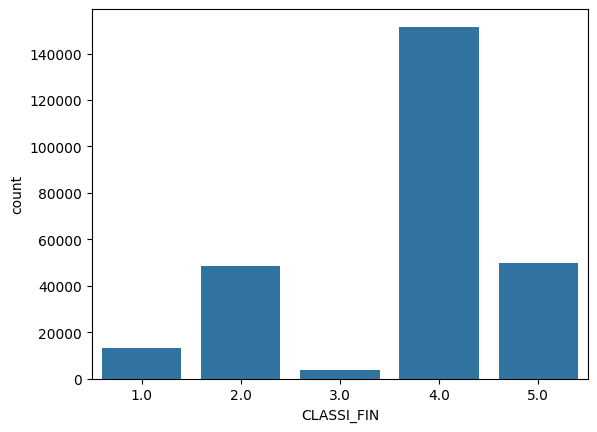

In [12]:
# Quantidade de itens de cada classe
sns.countplot(x="CLASSI_FIN", data=var_dfPrincipal)

plt.show()

Quantidade de cada classe
- 4.0 -> 151560
- 5.0 -> 49647
- 2.0 -> 48390
- 1.0 -> 13359
- 3.0 -> 3558

In [13]:
# Calcula a porcentagem de valores nulos em cada coluna.
var_floatPorcentagemNulo = var_dfPrincipal.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
var_srColunasAltaPorcentagemNulo = var_floatPorcentagemNulo[var_floatPorcentagemNulo > 80]
print(var_srColunasAltaPorcentagemNulo)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos.
var_dfColunasAltaPorcentagemNulo = pd.DataFrame(var_srColunasAltaPorcentagemNulo, columns=['Porcentagem de Nulos'])

# Exibe o novo DataFrame.
print(var_dfColunasAltaPorcentagemNulo)

OBES_IMC       99.766321
MORB_DESC      81.270014
DT_UT_DOSE     96.427026
MAE_VAC        93.987104
DT_VAC_MAE     99.789401
                 ...    
FAB_RE_BI      92.585394
DOSE_ADIC      98.195843
DOS_RE_BI      92.580345
LOTE_ADIC      98.218201
TABAG         100.000000
Length: 84, dtype: float64
            Porcentagem de Nulos
OBES_IMC               99.766321
MORB_DESC              81.270014
DT_UT_DOSE             96.427026
MAE_VAC                93.987104
DT_VAC_MAE             99.789401
...                          ...
FAB_RE_BI              92.585394
DOSE_ADIC              98.195843
DOS_RE_BI              92.580345
LOTE_ADIC              98.218201
TABAG                 100.000000

[84 rows x 1 columns]


In [14]:
# Colunas com mais de 80% dos dados nulos
var_dfColunasAltaPorcentagemNulo.sort_values(by='Porcentagem de Nulos')

Porcentagem de Nulos
MORB_DESC              81.270014
DOSE_2REF              82.651891
FAB_COVRF2             82.680380
LOTE_REF2              82.691919
DT_SAIDUTI             84.037014
...                          ...
DT_RT_VGM             100.000000
PAIS_VGM              100.000000
DT_TRT_COV            100.000000
VG_REINF              100.000000
TABAG                 100.000000

[84 rows x 1 columns]

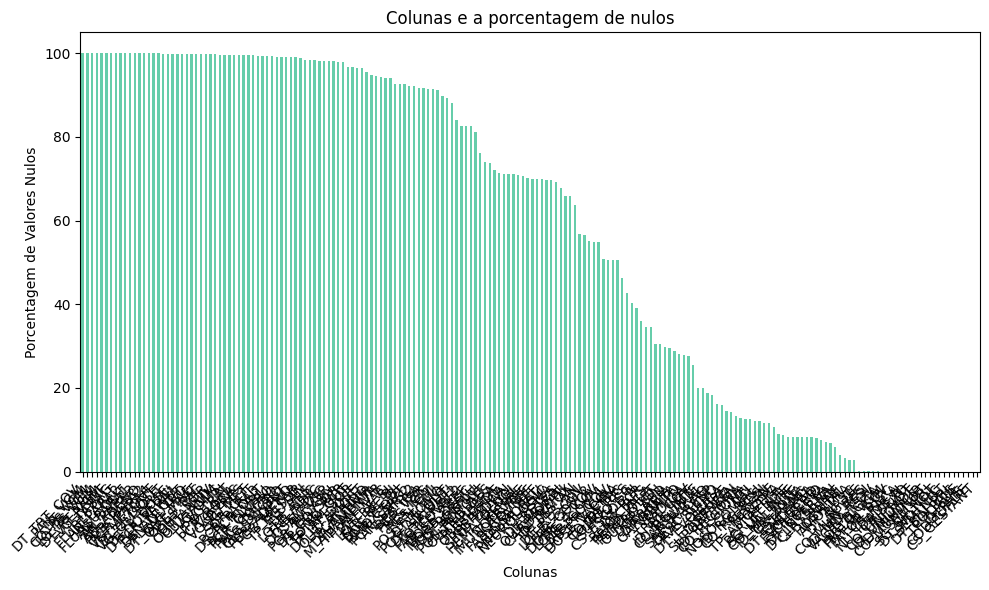

In [15]:
# Cria um gráfico de barras mostrando a quantidade de nulos que cada coluna tem
var_intNumeroNulos = (var_dfPrincipal.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
var_intNumeroNulos.plot(kind='bar', color='mediumaquamarine')
plt.title('Colunas e a porcentagem de nulos')
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
# Mostrando os nulos da coluna target
var_dfPrincipal['CLASSI_FIN'].isna().mean()

np.float64(0.03891036551942994)

In [17]:
# Quantidade de linhas duplicadas
var_dfPrincipal.duplicated().sum()

np.int64(196)

# Cleaning

removendo as colunas que tem mais de 80% dos dados nulos

In [ ]:
# Cria uma cópia do DataFrame principal para evitar modificar o original.
var_dfCopia = var_dfPrincipal.copy()

# Calcula a porcentagem de valores nulos em cada coluna no DataFrame copiado.
var_srColunasAltaPorcentagemNulo = var_dfCopia.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
columns_to_drop = var_srColunasAltaPorcentagemNulo[var_srColunasAltaPorcentagemNulo > 80].index.tolist()
# print(columns_to_drop)  # Descomente esta linha para verificar as colunas que serão removidas.

# Remove as colunas selecionadas do DataFrame copiado.
var_dfCopia.drop(columns=columns_to_drop, inplace=True)

# Exibe um resumo das informações do DataFrame copiado após a remoção das colunas,
# incluindo o tipo de dados e o número de valores não nulos em cada coluna.
var_dfCopia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: float64(55), int64(7), object(44)
memory usage: 224.3+ MB


In [ ]:
# Retirando os nulos da coluna de classificação final
var_dfFiltrada = var_dfCopia.dropna(subset=['CLASSI_FIN']).copy()

In [ ]:
# Verificando a quantidade de nulos das colunas, ordenando do maior para o menor
var_dfFiltrada.isna().sum().sort_values(ascending=False)

POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64

Removendo as linhas inteiramente nulas

In [ ]:
# Remove as linhas que têm todos os valores nulos do DataFrame filtrado.
var_dfFiltrada.dropna(how='all', inplace=True)

# Calcula o número de valores nulos em cada coluna do DataFrame filtrado e ordena em ordem decrescente.
var_srQuantidadeNulos = var_dfFiltrada.isna().sum().sort_values(ascending=False)

# Exibe a série com a contagem de valores nulos em cada coluna, ordenada de forma decrescente.
print(var_srQuantidadeNulos)


POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64


In [ ]:
# Exibe um resumo das informações do DataFrame filtrado.
# O parâmetro 'max_cols' é definido para mostrar até 107 colunas no resumo.
var_dfFiltrada.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
Index: 266514 entries, 0 to 277303
Data columns (total 106 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  266514 non-null  object 
 1    SEM_NOT     266514 non-null  int64  
 2    DT_SIN_PRI  266514 non-null  object 
 3    SEM_PRI     266514 non-null  int64  
 4    SG_UF_NOT   266514 non-null  object 
 5    ID_REGIONA  232597 non-null  object 
 6    CO_REGIONA  232597 non-null  float64
 7    ID_MUNICIP  266514 non-null  object 
 8    CO_MUN_NOT  266514 non-null  int64  
 9    ID_UNIDADE  266514 non-null  object 
 10   CO_UNI_NOT  266514 non-null  int64  
 11   CS_SEXO     266514 non-null  object 
 12   DT_NASC     266433 non-null  object 
 13   NU_IDADE_N  266514 non-null  int64  
 14   TP_IDADE    266514 non-null  int64  
 15   COD_IDADE   266514 non-null  object 
 16   CS_GESTANT  266514 non-null  int64  
 17   CS_RACA     266514 non-null  float64
 18   CS_ESCOL_N  172044 non-null

In [ ]:
# Quantidade de linhas duplicadas
var_dfFiltrada.duplicated().sum()

np.int64(190)

Removendo as linhas duplicadas

In [ ]:
var_dfFiltrada.drop_duplicates(inplace=True)

### Tratando as colunas

Ajustando os valores de colunas que tem dados nulos para o valor de 9.0 que é ignorado

In [ ]:
# Lista de colunas a serem tratadas no DataFrame.
var_listColunasTratar = [
      'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
      'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
      'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
      'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
      'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
      'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
      'RES_AN', 'TP_TES_AN', 'TOMO_RES'
]

# Itera sobre cada coluna na lista de colunas a serem tratadas.
for coluna in var_listColunasTratar:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_intFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistro = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_intPorcetagens = (var_intFrequencia / var_intTotalRegistro) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_intPorcetagens}:\n')

        # Substitui os valores 6.0 por 9 na coluna.
        var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)

        # Preenche os valores vazios (NaN) com 9 na coluna.
        var_dfFiltrada[coluna].fillna(value=9, inplace=True)

        # Exibe as estatísticas descritivas da coluna após o tratamento.
        print('\n\n', var_dfFiltrada[coluna].describe())

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- PUERPERA  - 
PUERPERA
2.0    97.988825
9.0     1.157557
1.0     0.853618
Name: count, dtype: float64:



 count    266324.000000
mean          6.988837
std           3.170683
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PUERPERA, dtype: float64


Porcentagens -- SURTO_SG  - 
SURTO_SG
2.0    84.791420
9.0     9.715088
1.0     5.493492
Name: count, dtype: float64:



 count    266324.000000
mean          4.978252
std           3.500726
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: SURTO_SG, dtype: float64


Porcentagens -- GARGANTA  - 
GARGANTA
2.0    81.679393
1.0    15.318993
9.0     3.001614
Name: count, dtype: float64:



 count    266324.000000
mean          3.960766
std           3.281809
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: GARGANTA

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    266324.000000
mean          6.643160
std           3.430071
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: DIABETES, dtype: float64


Porcentagens -- NEUROLOGIC  - 
NEUROLOGIC
2.0    82.169313
1.0    16.703074
9.0     1.127613
Name: count, dtype: float64:



 count    266324.000000
mean          6.819123
std           3.304708
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: NEUROLOGIC, dtype: float64


Porcentagens -- PNEUMOPATI  - 
PNEUMOPATI
2.0    81.936092
1.0    16.845277
9.0     1.218631
Name: count, dtype: float64:



 count    266324.000000
mean          6.828465
std           3.301268
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PNEUMOPATI, dtype: float64


Porcentagens -- IMUNODEPRE  - 
IMUNODEPRE
2.0    88.622338
1.0    10.117340
9.0     1.2603

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    266324.000000
mean          3.814579
std           2.307126
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           9.000000
Name: RES_AN, dtype: float64


Porcentagens -- TP_TES_AN  - 
TP_TES_AN
2.0    94.542599
1.0     4.008126
2       1.380994
1       0.068282
Name: count, dtype: float64:



 count     266324
unique         5
top            9
freq      149162
Name: TP_TES_AN, dtype: int64


Porcentagens -- TOMO_RES  - 
TOMO_RES
6.0    71.732739
9.0     8.548804
5.0     6.695739
1.0     5.564135
2.0     3.869198
3.0     2.961197
4.0     0.628189
Name: count, dtype: float64:



 count    266324.000000
mean          8.274864
std           2.045999
min           1.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: TOMO_RES, dtype: float64


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].fillna(value=9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Criando a coluna coriza a partir da coluna Outro_sin

In [ ]:
# Adiciona uma nova coluna 'Coriza' ao DataFrame filtrado com valor padrão 0.
var_dfFiltrada['Coriza'] = 0

# Preenche os valores nulos na coluna 'OUTRO_DES' com a string 'sem sintomas'.
var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)

# Verifica se a string 'coriza' (independente de maiúsculas/minúsculas) está presente na coluna 'OUTRO_DES'.
# Se a string 'coriza' estiver presente, atualiza o valor na coluna 'Coriza' para 1.
var_dfFiltrada.loc[var_dfFiltrada['OUTRO_DES'].str.contains('CORIZA', case=False), 'Coriza'] = 1


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_20232\1955746177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)


In [ ]:
# Criado uma coluna somente para a Coriza que é um sintoma importante no caso de gripes
var_dfFiltrada[['Coriza', 'OUTRO_DES']].head(30)


Coriza                  OUTRO_DES
0        0               sem sintomas
1        0               sem sintomas
2        0               sem sintomas
3        0               sem sintomas
4        0               sem sintomas
5        0               sem sintomas
6        0                CHEGA EM VM
7        0               sem sintomas
8        0               sem sintomas
9        0               sem sintomas
10       0               sem sintomas
11       0               sem sintomas
12       0               sem sintomas
13       1     CORIZA CONGESTAO NASAL
15       0               sem sintomas
16       1                     CORIZA
17       0               sem sintomas
18       0               DOR TORACICA
19       0               sem sintomas
20       0               sem sintomas
21       0               sem sintomas
22       0               sem sintomas
23       0               sem sintomas
24       0               sem sintomas
25       0               sem sintomas
26       0               sem sintomas
27       0                 HIPOTENSAO
28       0               sem sintomas
29       1                     CORIZA
30       0  INAPETENCIA, TSC, CIANOSE

In [ ]:
# Quantidade de vezes que o sintoma coriza apareceu.
var_dfFiltrada['Coriza'].sum()

np.int64(26832)

Removendo as colunas de outros sintomas, por não sabermos que outros sintomas são esses

In [ ]:
# Lista de colunas a serem analisadas para formatos diferentes e dados como datas.
var_listColunasAnalise = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1',
    'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF'
]

# Itera sobre cada coluna na lista de colunas a serem analisadas.
for coluna in var_listColunasAnalise:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_srFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistros = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_srPorcentagens = (var_srFrequencia / var_intTotalRegistros) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_srPorcentagens}:\n')

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- RAIOX_RES  - 
RAIOX_RES
6.0    29.532025
2.0    23.474290
5.0    13.973839
1.0    11.622124
9.0    10.862652
3.0     5.835025
4.0     3.183920
6       0.435837
2       0.368742
5       0.214253
1       0.175350
9       0.168020
3       0.100361
4       0.053563
Name: count, dtype: float64:



Porcentagens -- DT_RAIOX  - 
DT_RAIOX
23/05/2023    0.502186
22/05/2023    0.494053
24/05/2023    0.493036
24/04/2023    0.491003
29/05/2023    0.477788
                ...   
29/08/2024    0.001017
12/12/2202    0.001017
15/02/2202    0.001017
29/03/2032    0.001017
23/12/2202    0.001017
Name: count, Length: 437, dtype: float64:



Porcentagens -- DT_PCR  - 
DT_PCR
07/06/2023    0.642639
30/05/2023    0.629366
18/05/2023    0.619964
25/05/2023    0.587334
02/06/2023    0.566318
                ...   
18/02/2024    0.000553
05/02/2024    0.000553
07/02/2024    0.000553
28/01/2024    0.000553
09/02/2024    0.000553
Name: count, Length: 404, dtype: float64:



Porcentagens -- DT_E

In [ ]:
# criando uma copia do dataframe
var_dfFinal = var_dfFiltrada.copy()

In [ ]:
# Lista de colunas a serem removidas do DataFrame, pois não são relevantes para a análise.
var_listColunasRemover = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DT_RES_AN', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF',
    'FAB_COVREF', 'DT_ENTUTI', 'FAB_COV_1', 'FAB_COV_2', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF',
    'CO_RG_INTE', 'OUTRO_DES', 'OUTRO_SIN', 'ID_RG_INTE', 'CO_MU_INTE', 'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC',
    'DT_INTERNA', 'DT_COLETA', 'DT_ENCERRA', 'DT_DIGITA'
]

# Remove as colunas listadas do DataFrame final.
var_dfFinal.drop(columns=var_listColunasRemover, axis=1, inplace=True)


In [ ]:
var_dfFinal.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Index: 266324 entries, 0 to 277303
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     266324 non-null  int64  
 1   SEM_PRI     266324 non-null  int64  
 2   SG_UF_NOT   266324 non-null  object 
 3   ID_REGIONA  232439 non-null  object 
 4   CO_REGIONA  232439 non-null  float64
 5   ID_MUNICIP  266324 non-null  object 
 6   CO_MUN_NOT  266324 non-null  int64  
 7   ID_UNIDADE  266324 non-null  object 
 8   CO_UNI_NOT  266324 non-null  int64  
 9   CS_SEXO     266324 non-null  object 
 10  NU_IDADE_N  266324 non-null  int64  
 11  TP_IDADE    266324 non-null  int64  
 12  COD_IDADE   266324 non-null  object 
 13  CS_GESTANT  266324 non-null  int64  
 14  CS_RACA     266324 non-null  float64
 15  CS_ESCOL_N  266324 non-null  object 
 16  ID_PAIS     266324 non-null  object 
 17  CO_PAIS     266324 non-null  object 
 18  SG_UF       266257 non-null  object 
 19  ID_RG_R

In [ ]:
# Removendo agora todas os nulos
var_dfFinal.dropna(inplace=True)

In [ ]:
# Adaptação para esse novo dataSet - Antiga limpeza
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
    'CO_REGIONA', 'CS_RACA', 'CO_MUN_RES', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV', 'FNT_IN_COV',
    'REINF', 'CO_PAIS', 'COD_IDADE', 'CO_RG_RESI', 'EVOLUCAO'
]

Ajustando o tipo de valor das colunas

In [ ]:
# Lista de colunas a serem convertidas para o tipo float.
var_listColunasFloat = ['CS_ESCOL_N', 'TP_TES_AN', 'CO_RG_RESI', 'CO_PAIS', 'COD_IDADE', 'EVOLUCAO']

# Converte as colunas listadas para o tipo float.
var_dfFinal[var_listColunasFloat] = var_dfFinal[var_listColunasFloat].astype('float')


In [ ]:
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
    'CO_REGIONA', 'CS_RACA', 'CO_MUN_RES', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV', 'FNT_IN_COV',
    'CO_PAIS', 'COD_IDADE', 'CO_RG_RESI', 'EVOLUCAO'
]

# Converte as colunas listadas para o tipo Int32.
for var_strColuna in var_listColunasInt:
    var_dfFinal[var_strColuna] = var_dfFinal[var_strColuna].astype('Int32')


In [ ]:
var_dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114217 entries, 1 to 277293
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     114217 non-null  int64  
 1   SEM_PRI     114217 non-null  int64  
 2   SG_UF_NOT   114217 non-null  object 
 3   ID_REGIONA  114217 non-null  object 
 4   CO_REGIONA  114217 non-null  Int32  
 5   ID_MUNICIP  114217 non-null  object 
 6   CO_MUN_NOT  114217 non-null  int64  
 7   ID_UNIDADE  114217 non-null  object 
 8   CO_UNI_NOT  114217 non-null  int64  
 9   CS_SEXO     114217 non-null  object 
 10  NU_IDADE_N  114217 non-null  int64  
 11  TP_IDADE    114217 non-null  int64  
 12  COD_IDADE   114217 non-null  Int32  
 13  CS_GESTANT  114217 non-null  int64  
 14  CS_RACA     114217 non-null  Int32  
 15  CS_ESCOL_N  114217 non-null  Int32  
 16  ID_PAIS     114217 non-null  object 
 17  CO_PAIS     114217 non-null  Int32  
 18  SG_UF       114217 non-null  object 
 19  ID_RG_R

In [ ]:
# Plotando Object
var_dfObject= var_dfFinal.select_dtypes(include=[object])
var_dfObject.head(20)

SG_UF_NOT                      ID_REGIONA           ID_MUNICIP  \
1         PR              02RS METROPOLITANA             CURITIBA   
3         PR                   17RS LONDRINA             LONDRINA   
11        MS          EX ARS DE CAMPO GRANDE         CAMPO GRANDE   
12        RS                         013 CRS    SANTA CRUZ DO SUL   
13        SP     GVE XXI PRESIDENTE PRUDENTE  PRESIDENTE PRUDENTE   
15        MS          EX ARS DE CAMPO GRANDE    PARAISO DAS AGUAS   
19        PR                   17RS LONDRINA             LONDRINA   
21        BA  NUCLEO REGIONAL DE SAUDE LESTE             SALVADOR   
22        BA  NUCLEO REGIONAL DE SAUDE LESTE             SALVADOR   
28        MG              CORONEL FABRICIANO              TIMOTEO   
29        SP                GVE XVI BOTUCATU             BOTUCATU   
30        RS                         006 CRS          PASSO FUNDO   
32        PI                  4 GRS TERESINA             TERESINA   
35        RS                         014 CRS           SANTA ROSA   
38        SC                         TUBARAO              TUBARAO   
39        PI                  4 GRS TERESINA             TERESINA   
41        PB                     X NRS SOUSA                SOUSA   
44        RS                         006 CRS         NAO-ME-TOQUE   
46        GO                        PIRINEUS             ANAPOLIS   
48        MG                  BELO HORIZONTE                BETIM   

                                                    ID_UNIDADE CS_SEXO  \
1                  HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE       M   
3                       HOSPITAL DO CORACAO UNIDADE BELA SUICA       F   
11                 EBSERH HOSP UNIV MARIA APARECIDA PEDROSSIAN       M   
12                                         HOSPITAL SANTA CRUZ       M   
13                                             HOSPITAL UNIMED       M   
15           PRONTO ATENDIMENTO MEDICO LAURENTINA CORREA LEITE       M   
19                                                       ISCAL       F   
21                               HOSPITAL GERAL ROBERTO SANTOS       F   
22                                         HOSPITAL SAO RAFAEL       F   
28                           HOSPITAL E MATERNIDADE DE TIMOTEO       F   
29  HOSPITAL DAS CLINICAS DA FACULDADE DE MEDICINA DE BOTUCATU       M   
30                               HOSPITAL SAO VICENTE DE PAULO       M   
32          UNIDADE DE PRONTO ATENDIMENTO DR ANTONIO DIB TAJRA       F   
35                                         HOSPITAL VIDA SAUDE       F   
38                         HOSPITAL NOSSA SENHORA DA CONCEICAO       M   
39          UNIDADE DE PRONTO ATENDIMENTO DR ANTONIO DIB TAJRA       F   
41         HOSPITAL DISTRITAL DEP MANOEL GONCALVES DE ABRANTES       M   
44                            HOSPITAL ALTO JACUI NAO ME TOQUE       M   
46                       UPA III DR ALAIR MAFRA ANAPOLIS GOIAS       M   
48                                 HOSPITAL MATER DEI SA BETIM       F   

   ID_PAIS SG_UF                      ID_RG_RESI           ID_MN_RESI  \
1   BRASIL    PR              02RS METROPOLITANA             CURITIBA   
3   BRASIL    PR                   17RS LONDRINA             LONDRINA   
11  BRASIL    MS          EX ARS DE CAMPO GRANDE      CHAPADAO DO SUL   
12  BRASIL    RS                         013 CRS            HERVEIRAS   
13  BRASIL    SP     GVE XXI PRESIDENTE PRUDENTE      ALVARES MACHADO   
15  BRASIL    MS          EX ARS DE CAMPO GRANDE    PARAISO DAS AGUAS   
19  BRASIL    PR                   17RS LONDRINA             LONDRINA   
21  BRASIL    BA  NUCLEO REGIONAL DE SAUDE LESTE             SALVADOR   
22  BRASIL    BA  NUCLEO REGIONAL DE SAUDE LESTE     LAURO DE FREITAS   
28  BRASIL    MG              CORONEL FABRICIANO              TIMOTEO   
29  BRASIL    SP                GVE XVI BOTUCATU       TORRE DE PEDRA   
30  BRASIL    RS                         006 CRS             TAPEJARA   
32  BRASIL    PI                  4 GRS TERESINA 

In [ ]:
# Usando o label encoder para as colunas de itens objetos
var_listColunasObjetos = var_dfObject.columns

le= LabelEncoder()

for coluna in var_listColunasObjetos:
    print(coluna)
    le.fit(var_dfFinal[coluna])
    var_dfFinal[coluna] = le.transform(var_dfFinal[coluna])

var_dfFinal[var_listColunasObjetos]

SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
SG_UF_INTE
ID_MN_INTE


SG_UF_NOT  ID_REGIONA  ID_MUNICIP  ID_UNIDADE  CS_SEXO  ID_PAIS  \
1              15          33         284        1556        2        0   
3              15          68         554         480        0        0   
11              9         122         170         140        2        0   
12             18          24         843        1349        2        0   
13             21         141         775        1494        2        0   
...           ...         ...         ...         ...      ...      ...   
277286         21         144         802        1436        0        0   
277288          9         122         170        1241        0        0   
277289         21         129         386         317        2        0   
277290          9         122         170        1771        0        0   
277293         21         138         166          83        0        0   

        SG_UF  ID_RG_RESI  ID_MN_RESI  SG_UF_INTE  ID_MN_INTE  
1          15          34        1046          15         286  
3          15          80        1978          15         558  
11          9         144         872           9         171  
12         18          25        1425          18         846  
13         21         163         113          21         779  
...       ...         ...         ...         ...         ...  
277286     21         166        2936          21         805  
277288      9         144         673           9         171  
277289     21         148        3385          21         390  
277290      9         144         673           9         171  
277293     21         160         659          21         167  

[114217 rows x 11 columns]

Gráfico de correlação das colunas

             SEM_NOT   SEM_PRI  SG_UF_NOT  ID_REGIONA  CO_REGIONA  ID_MUNICIP  \
SEM_NOT     1.000000  0.945354  -0.005090   -0.000048   -0.011275    0.010385   
SEM_PRI     0.945354  1.000000   0.001406   -0.001906   -0.011686    0.011484   
SG_UF_NOT  -0.005090  0.001406   1.000000   -0.112329   -0.308892    0.109664   
ID_REGIONA -0.000048 -0.001906  -0.112329    1.000000    0.076829    0.150279   
CO_REGIONA -0.011275 -0.011686  -0.308892    0.076829    1.000000   -0.003876   
...              ...       ...        ...         ...         ...         ...   
FNT_IN_COV  0.015684  0.015217   0.061846    0.015546    0.008445    0.065004   
TRAT_COV   -0.029300 -0.027862  -0.064172   -0.050184   -0.026610   -0.036058   
CO_DETEC   -0.088682 -0.097335  -0.137795   -0.015739   -0.007842   -0.154273   
REINF            NaN       NaN        NaN         NaN         NaN         NaN   
Coriza     -0.024895 -0.024205   0.103889   -0.019319   -0.033886   -0.004166   

            CO_MUN_NOT  ID_

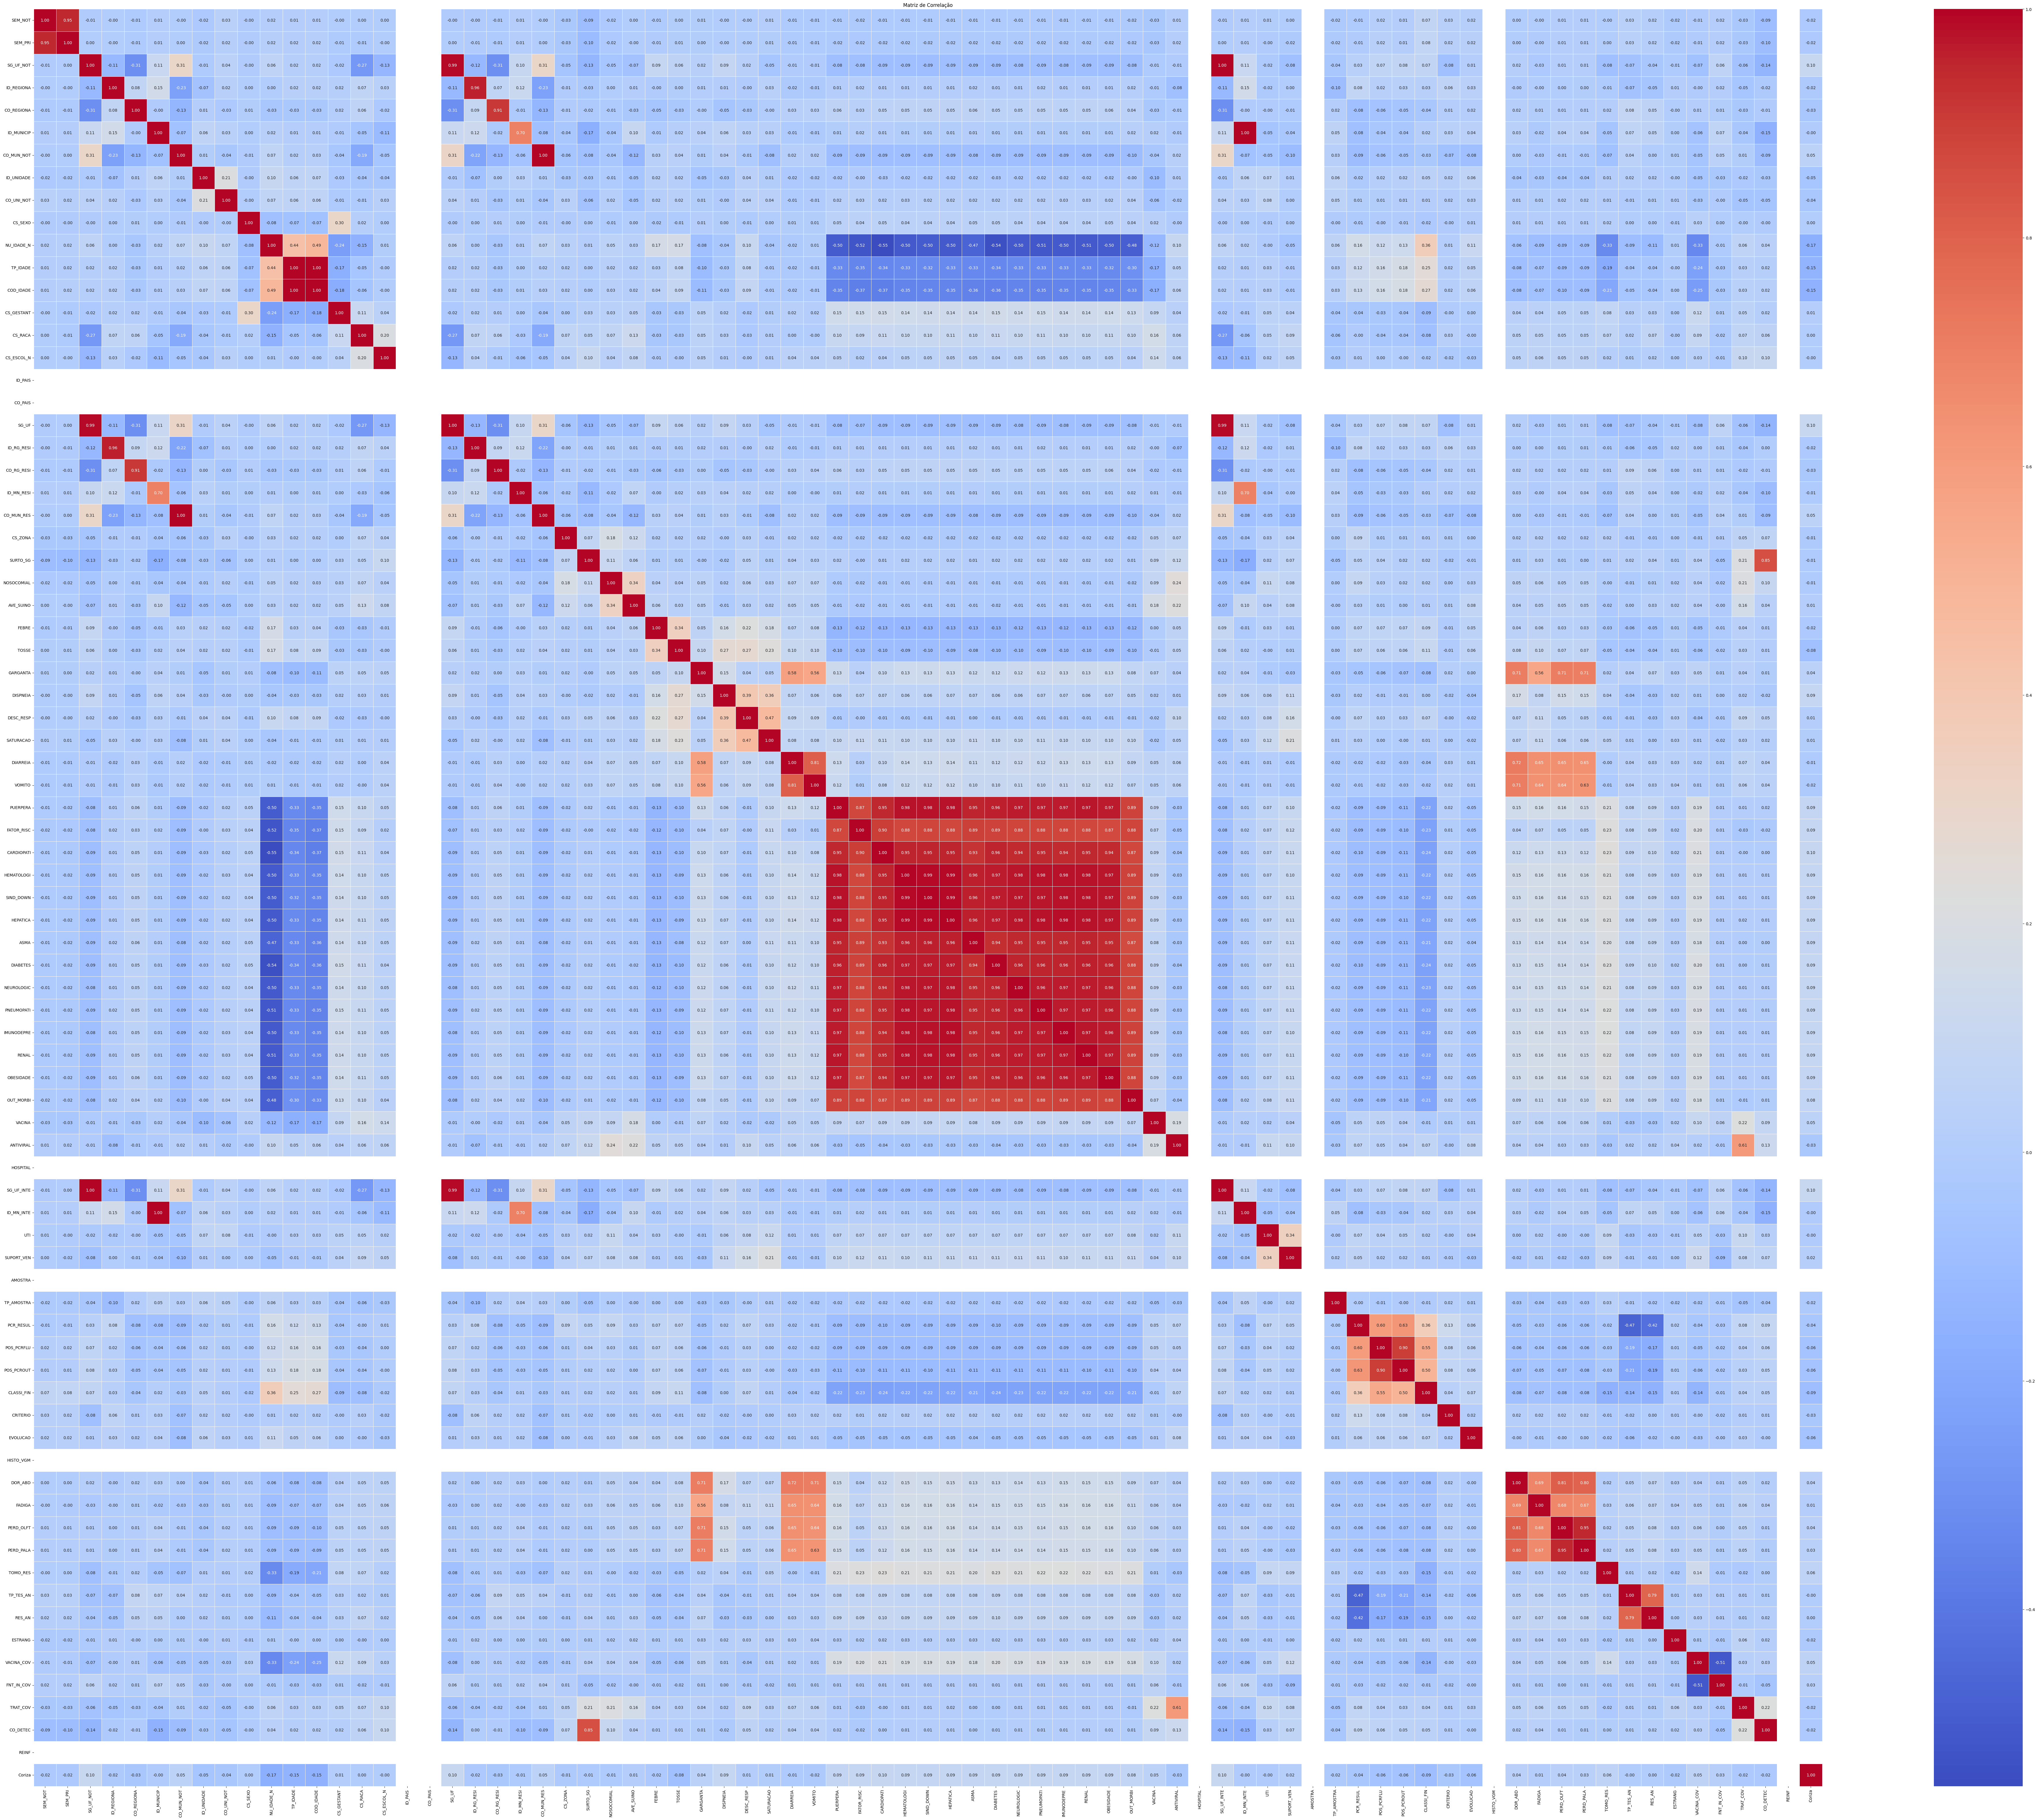

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Supondo que seu DataFrame seja var_dfFinal
# Calcular a matriz de correlação
correlation_matrix = var_dfFinal.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Definir o tamanho da figura para aumentar a resolução
plt.figure(figsize=(100, 80))  # Ajuste o tamanho conforme necessário

# Visualizar a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
var_dfFinal.corr()

SEM_NOT   SEM_PRI  SG_UF_NOT  ID_REGIONA  CO_REGIONA  ID_MUNICIP  \
SEM_NOT     1.000000  0.945354  -0.005090   -0.000048   -0.011275    0.010385   
SEM_PRI     0.945354  1.000000   0.001406   -0.001906   -0.011686    0.011484   
SG_UF_NOT  -0.005090  0.001406   1.000000   -0.112329   -0.308892    0.109664   
ID_REGIONA -0.000048 -0.001906  -0.112329    1.000000    0.076829    0.150279   
CO_REGIONA -0.011275 -0.011686  -0.308892    0.076829    1.000000   -0.003876   
...              ...       ...        ...         ...         ...         ...   
FNT_IN_COV  0.015684  0.015217   0.061846    0.015546    0.008445    0.065004   
TRAT_COV   -0.029300 -0.027862  -0.064172   -0.050184   -0.026610   -0.036058   
CO_DETEC   -0.088682 -0.097335  -0.137795   -0.015739   -0.007842   -0.154273   
REINF            NaN       NaN        NaN         NaN         NaN         NaN   
Coriza     -0.024895 -0.024205   0.103889   -0.019319   -0.033886   -0.004166   

            CO_MUN_NOT  ID_UNIDADE  CO_UNI_NOT   CS_SEXO  NU_IDADE_N  \
SEM_NOT      -0.001560   -0.021833    0.034108 -0.002981    0.015631   
SEM_PRI       0.003558   -0.016485    0.021528 -0.002657    0.019525   
SG_UF_NOT     0.307260   -0.010616    0.043279 -0.004624    0.064518   
ID_REGIONA   -0.232924   -0.065629    0.023827  0.002954    0.003390   
CO_REGIONA   -0.131997    0.010239   -0.025883  0.008172   -0.033721   
...                ...         ...         ...       ...         ...   
FNT_IN_COV    0.045139   -0.030359   -0.003322  0.003739   -0.008633   
TRAT_COV      0.005935   -0.024487   -0.052891 -0.001990    0.059825   
CO_DETEC     -0.094651   -0.027090   -0.051470 -0.002424    0.040375   
REINF              NaN         NaN         NaN       NaN         NaN   
Coriza        0.052344   -0.048420   -0.037840  0.003751   -0.171005   

            TP_IDADE  COD_IDADE  CS_GESTANT   CS_RACA  CS_ESCOL_N  ID_PAIS  \
SEM_NOT     0.013710   0.014335   -0.001055  0.001843    0.003839      NaN   
SEM_PRI     0.015984   0.016800   -0.008839 -0.010058   -0.001559      NaN   
SG_UF_NOT   0.016490   0.020318   -0.024048 -0.271212   -0.127304      NaN   
ID_REGIONA  0.023856   0.023342    0.016327  0.068648    0.033764      NaN   
CO_REGIONA -0.029016  -0.030382    0.015488  0.062170   -0.022073      NaN   
...              ...        ...         ...       ...         ...      ...   
FNT_IN_COV -0.029118  -0.028793    0.006201 -0.018662   -0.008240      NaN   
TRAT_COV    0.026460   0.029661    0.052069  0.067489    0.100308      NaN   
CO_DETEC    0.020150   0.022239    0.019233  0.058394    0.104508      NaN   
REINF            NaN        NaN         NaN       NaN         NaN      NaN   
Coriza     -0.145450  -0.152429    0.011956  0.002274   -0.000171      NaN   

            CO_PAIS     SG_UF  ID_RG_RESI  CO_RG_RESI  ID_MN_RESI  CO_MUN_RES  \
SEM_NOT         NaN -0.004401   -0.003295   -0.013113    0.011479   -0.001377   
SEM_PRI         NaN  0.001977   -0.005447   -0.013543    0.011613    0.003746   
SG_UF_NOT       NaN  0.992113   -0.122390   -0.307675    0.098427    0.305745   
ID_REGIONA      NaN -0.113990    0.959924    0.065580    0.118801   -0.232873   
CO_REGIONA      NaN -0.307932    0.089592    0.911481   -0.014800   -0.132195   
...             ...       ...         ...         ...         ...         ...   
FNT_IN_COV      NaN  0.061465    0.008952    0.007384    0.023320    0.043912   
TRAT_COV        NaN -0.063321   -0.040531   -0.020974   -0.044204    0.005850   
CO_DETEC        NaN -0.137008    0.002145   -0.007674   -0.099231   -0.092940   
REINF           NaN       NaN         NaN         NaN         NaN         NaN   
Coriza          NaN  0.103788   -0.020469   -0.030269   -0.009152    0.051858   

             CS_ZONA  SURTO_SG  NOSOCOMIAL  AVE_SUINO     FEBRE     TOSSE  \
SEM_NOT    -0.027191 -0.094878   -0.020620   0.003453 -0.009388  0.004403   
SEM_PRI    -0.027696 -0.101631   -0.022279  -0.000348 -0.007394  0.007923   
SG_UF_NOT  -0.054957 -0.132668   -

# Modeling
Iniciando a modelagem do problema e separando em treino e teste

### Teste para as melhores colunas

In [ ]:
var_dfFinal.head(5)

SEM_NOT  SEM_PRI  SG_UF_NOT  ID_REGIONA  CO_REGIONA  ID_MUNICIP  \
1         9        8         15          33        1356         284   
3        12       11         15          68        1371         554   
11       16       15          9         122        1975         170   
12       17       16         18          24        1609         843   
13       15       14         21         141        1346         775   

    CO_MUN_NOT  ID_UNIDADE  CO_UNI_NOT  CS_SEXO  NU_IDADE_N  TP_IDADE  \
1       410690        1556       15245        2           2         2   
3       411370         480     7758391        0          92         3   
11      500270         140        9709        2          37         3   
12      431680        1349     2254964        2           1         2   
13      354140        1494     7701810        2           1         2   

    COD_IDADE  CS_GESTANT  CS_RACA  CS_ESCOL_N  ID_PAIS  CO_PAIS  SG_UF  \
1        2002           6        4           5        0        1     15   
3        3092           5        1           2        0        1     15   
11       3037           6        4           2        0        1      9   
12       2001           6        1           5        0        1     18   
13       2001           6        1           9        0        1     21   

    ID_RG_RESI  CO_RG_RESI  ID_MN_RESI  CO_MUN_RES  CS_ZONA  SURTO_SG  \
1           34        1356        1046      410690        1       9.0   
3           80        1371        1978      411370        1       2.0   
11         144        1975         872      500295        1       2.0   
12          25        1609        1425      430957        2       9.0   
13         163        1346         113      350130        1       9.0   

    NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  \
1            2          2      1      1         2         1          1   
3            2          2      2      2         1         2          2   
11           2          2      1      1         2         1          1   
12           2          2      2      1         2         1          1   
13           2          1      2      1         2         1          1   

    SATURACAO  DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  \
1           1         9       9         9           2           9           9   
3           2         2       2         9           2           9           9   
11          1         2       2         9           2           9           9   
12          1         2       2         2           1           2           2   
13          1         2       2         9           2           9           9   

    SIND_DOWN  HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  \
1           9         9     9         9           9           9           9   
3           9         9     9         9           9           9           9   
11          9         9     9         9           9           9           9   
12          2         2     2         2           2           2           2   
13          9         9     9         9           9           9           9   

    RENAL  OBESIDADE  OUT_MORBI  VACINA  ANTIVIRAL  HOSPITAL  SG_UF_INTE  \
1       9          9          9       9          2         1          15   
3       9          9          9       2          2         1          15   
11      9          9          9       9          9         1           9   
12      2          2          1       9          2         1          18   
13      9          9          9       9          2         1          21   

    ID_MN_INTE  UTI  SUPORT_VEN  AMOSTRA  TP_AMOSTRA  PCR_RESUL  POS_PCRFLU  \
1          286    2           3        1           1          1         2.0   
3          558    2           3        1           1          4         9.0   
11         171    1           1        1           1          1         1.0   
12         846    1           1        1           1          2     

In [ ]:
# Teste para encontrar as melhores colunas
var_dfColunasParaPrevisao = var_dfFinal[['CS_SEXO', 'NU_IDADE_N','CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'NOSOCOMIAL',
                                  'AVE_SUINO','FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
                                  'VOMITO','PUERPERA','FATOR_RISC','CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES',
                                  'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'VACINA','Coriza', 'CLASSI_FIN']]
var_dfColunasParaPrevisao.head()

CS_SEXO  NU_IDADE_N  CS_GESTANT  CS_RACA  CS_ESCOL_N  NOSOCOMIAL  \
1         2           2           6        4           5           2   
3         0          92           5        1           2           2   
11        2          37           6        4           2           2   
12        2           1           6        1           5           2   
13        2           1           6        1           9           2   

    AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  \
1           2      1      1         2         1          1          1   
3           2      2      2         1         2          2          2   
11          2      1      1         2         1          1          1   
12          2      2      1         2         1          1          1   
13          1      2      1         2         1          1          1   

    DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  SIND_DOWN  \
1          9       9         9           2           9           9          9   
3          2       2         9           2           9           9          9   
11         2       2         9           2           9           9          9   
12         2       2         2           1           2           2          2   
13         2       2         9           2           9           9          9   

    HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  RENAL  \
1          9     9         9           9           9           9      9   
3          9     9         9           9           9           9      9   
11         9     9         9           9           9           9      9   
12         2     2         2           2           2           2      2   
13         9     9         9           9           9           9      9   

    OBESIDADE  VACINA  Coriza  CLASSI_FIN  
1           9       9       0           2  
3           9       2       0           5  
11          9       9       0           1  
12          2       9       0           4  
13          9       9       1           2

In [ ]:
# Lista de colunas a serem usadas como features (X) para previsão.
var_listColunasXTesteMelhoria = [var_coluna for var_coluna in var_dfColunasParaPrevisao.columns if var_coluna != 'CLASSI_FIN']

# Seleciona as colunas de features (X) e a coluna alvo (y) para previsão.
var_x = var_dfColunasParaPrevisao[var_listColunasXTesteMelhoria]  # Features (X).
var_y = var_dfColunasParaPrevisao[['CLASSI_FIN']]  # Alvo (y).


### Todas as colunas

In [ ]:
# Lista de colunas a serem usadas como features (X) para previsão, excluindo a coluna 'CLASSI_FIN'.
var_colunasX = [var_coluna for var_coluna in var_dfFinal.columns if var_coluna != 'CLASSI_FIN']

# Seleciona as colunas de features (X) e a coluna alvo (y) para previsão.
var_x = var_dfFinal[var_colunasX]  # Features (X).
var_y = var_dfFinal[['CLASSI_FIN']]  # Alvo (y).


Porcentagem de dados por cada tipo de classificação

In [ ]:
var_dfFinal['CLASSI_FIN'].value_counts()/len(var_dfFinal)*100

CLASSI_FIN
4    56.624671
2    20.995999
5    16.466901
1     4.789129
3       1.1233
Name: count, dtype: Float64

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste, mantendo a proporção das classes da variável alvo (stratify).
var_xTrain, var_xTest, var_yTrain, var_yTest = train_test_split(var_x, var_y, test_size=0.25, stratify=var_y, random_state=42)


In [ ]:
print(var_xTrain.shape)
print(var_xTest.shape)
print(var_yTrain.shape)
print(var_yTest.shape)

(85662, 78)
(28555, 78)
(85662, 1)
(28555, 1)


## LogisticRegression

In [ ]:
# Criação de um modelo de Regressão Logística.
var_lr = LogisticRegression()

# Treinamento do modelo de Regressão Logística com os dados de treinamento.
var_lr.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredLrTrain = var_lr.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredLrTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredLrTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_lr.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_lr.predict_proba(var_xTrain), multi_class="ovr")*100}%')



Acurácia Teste: 56.57152862896165%
Acurácia Treino: 56.607363825266745%

f1_score Test: 41.295511158892154%
f1_score Treino: 41.314900648098686%

Precisão Teste: 41.019822032116444%
Precisão Treino: 41.70894428057292%

Recall Teste: 56.57152862896165%
Recall Treino: 56.607363825266745%



c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Teste: 51.58199153921883%
ROC Treino: 51.714346685934785%


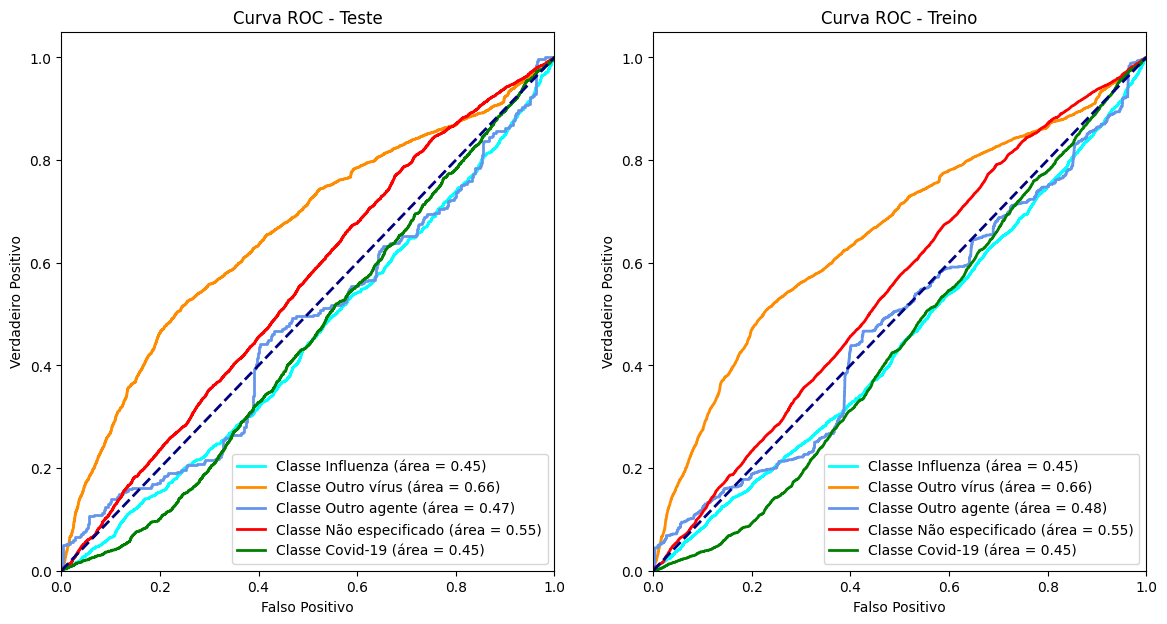

In [ ]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_lr.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_lr.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_lr.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_lr.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

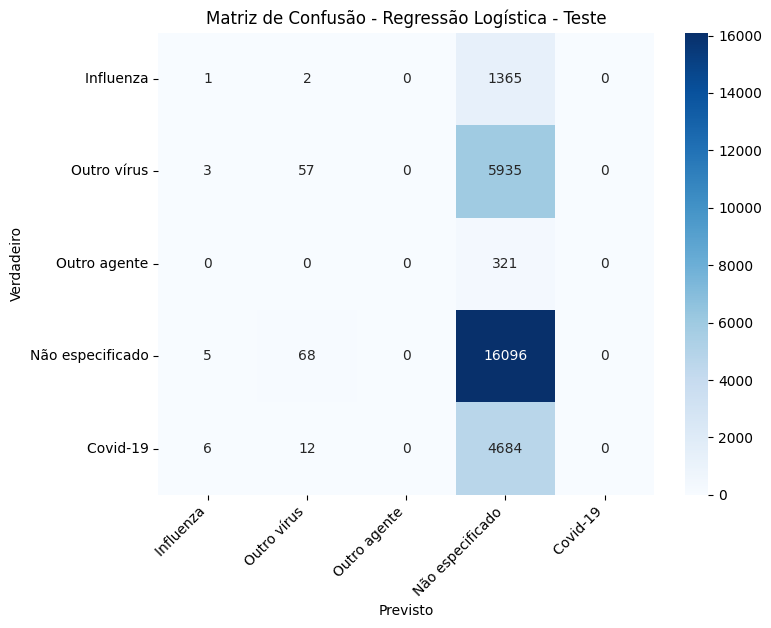

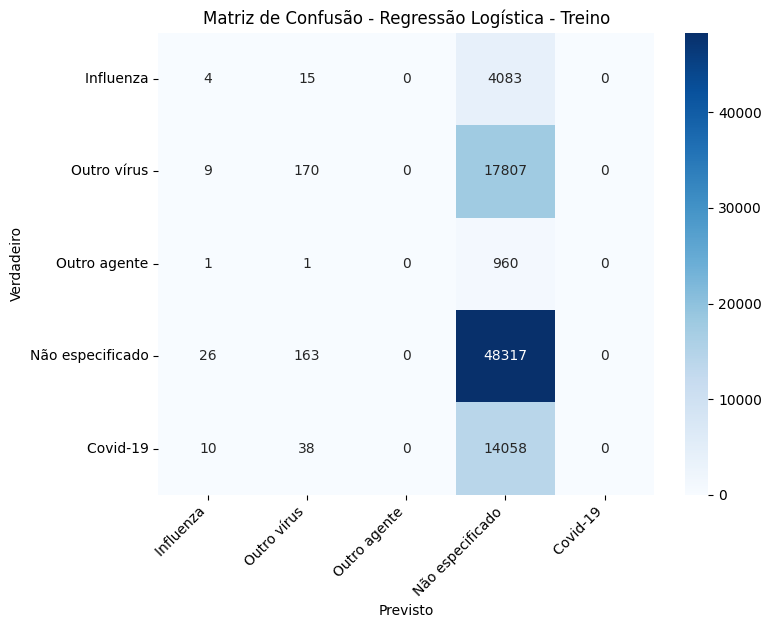

In [ ]:

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)
var_yPredLrTrain = var_lr.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_lr_test = confusion_matrix(var_yTest, var_yPredLrTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_lr_train = confusion_matrix(var_yTrain, var_yPredLrTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Treino')
plt.show()


## KNN

In [ ]:
# Criação de um modelo K-Vizinhos Mais Próximos com 5 vizinhos.
var_knn = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo K-Vizinhos Mais Próximos com os dados de treinamento.
var_knn.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredKnnTrain = var_knn.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredKnnTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredKnnTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_knn.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_knn.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 72.00140080546315%
Acurácia Treino: 78.22138170950946%

f1_score Test: 70.39256652944428%
f1_score Treino: 76.98355335816504%

Precisão Teste: 70.32869228163277%
Precisão Treino: 77.38476999848591%

Recall Teste: 72.00140080546315%
Recall Treino: 78.22138170950946%

ROC Teste: 81.04707010751075%
ROC Treino: 94.90644829163364%


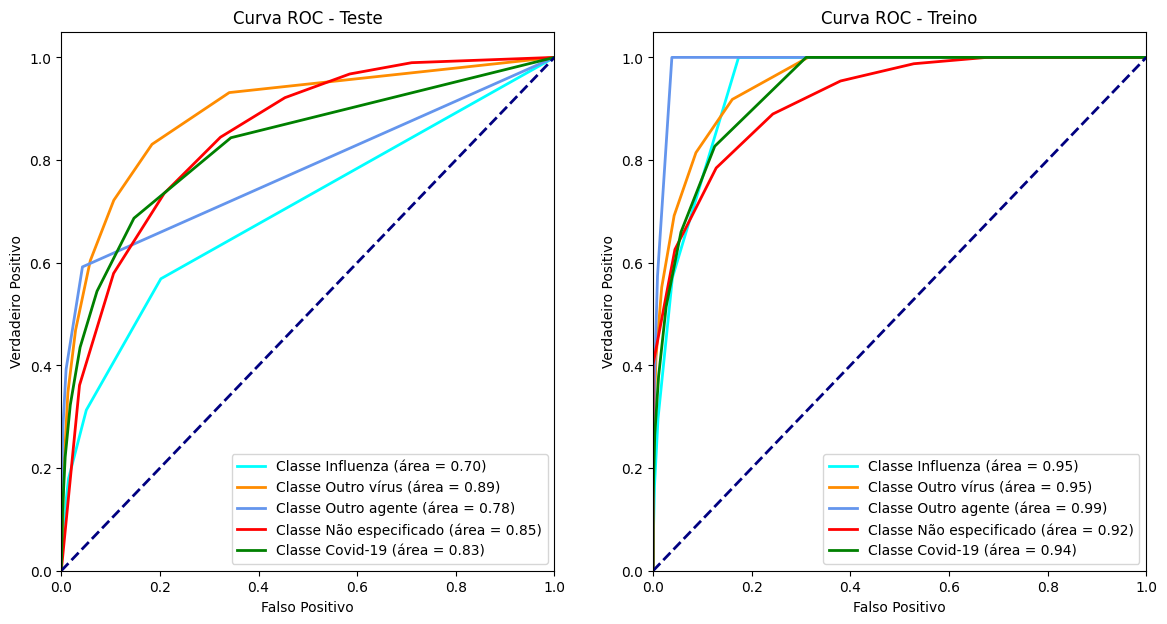

In [ ]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_knn.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_knn.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_knn.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_knn.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

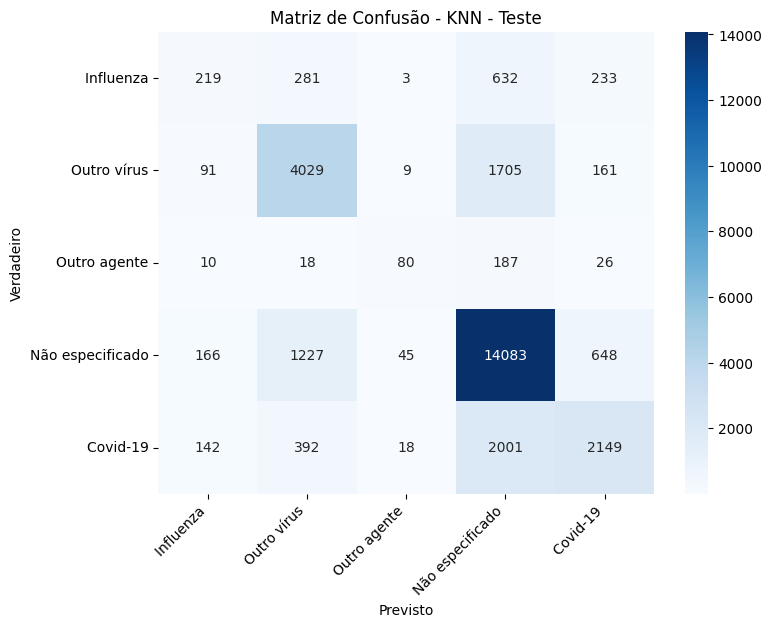

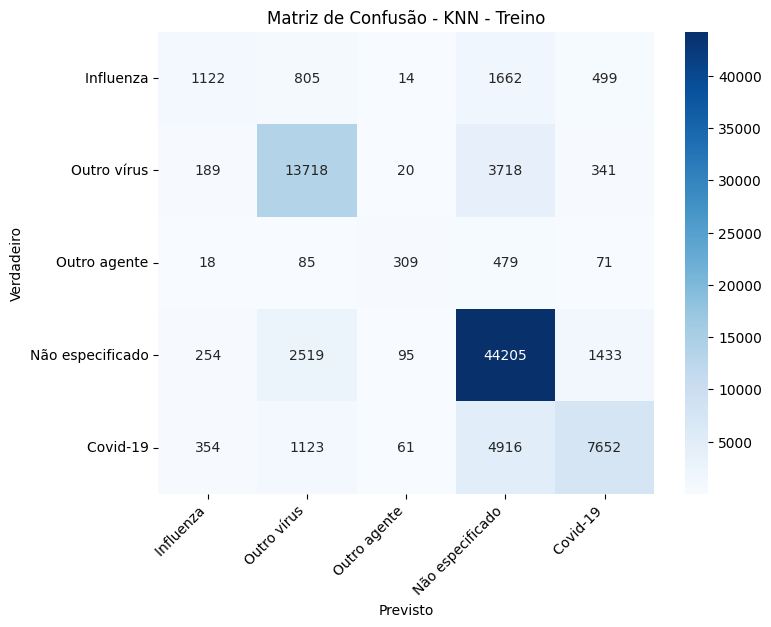

In [ ]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)
var_yPredKnnTrain = var_knn.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_knn_test = confusion_matrix(var_yTest, var_yPredKnnTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_knn_train = confusion_matrix(var_yTrain, var_yPredKnnTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_train, annot=True, fmt='d', cmap='Blues',  xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Treino')
plt.show()


##  Naive Bayes

In [ ]:
# Criação do classificador Naive Bayes Gaussiano.
var_nb = GaussianNB()

# Treinamento do modelo Naive Bayes Gaussiano com os dados de treinamento.
var_nb.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes
var_yPredNbTest = var_nb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredNbTrain = var_nb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredNbTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredNbTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_nb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_nb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 56.43144808264752%
Acurácia Treino: 56.295673694286855%

f1_score Test: 49.266342110467484%
f1_score Treino: 49.16679928601024%

Precisão Teste: 51.404473167762035%
Precisão Treino: 51.247170339696254%

Recall Teste: 56.43144808264752%


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall Treino: 56.295673694286855%

ROC Teste: 66.13512844165314%
ROC Treino: 66.24288356518085%


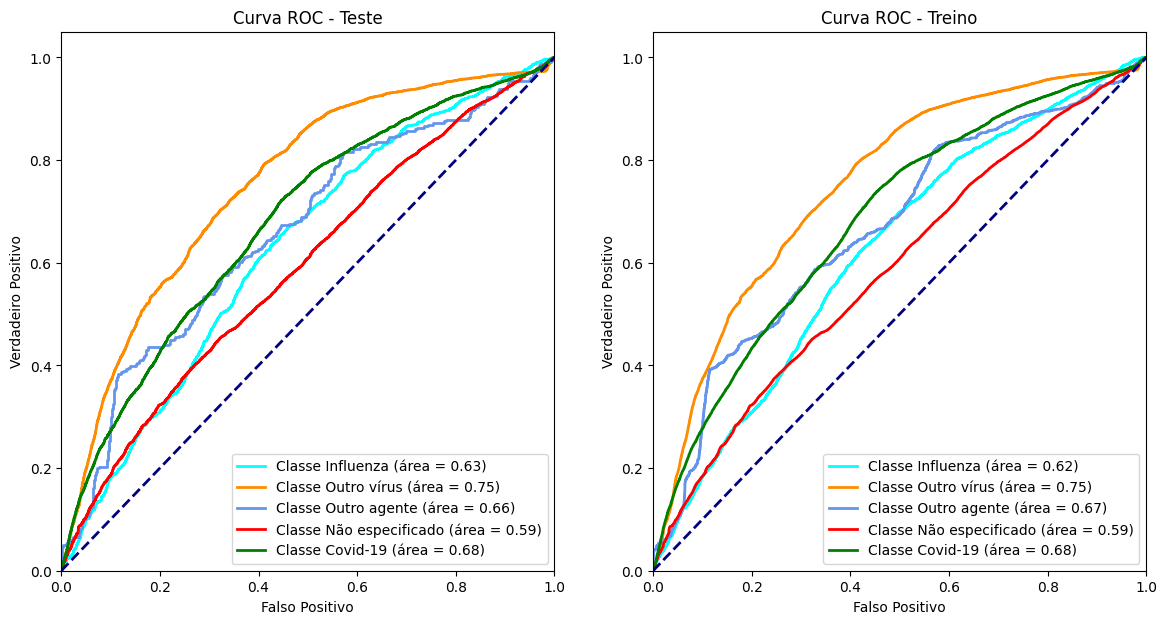

In [ ]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_nb.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_nb.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_nb.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_nb.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

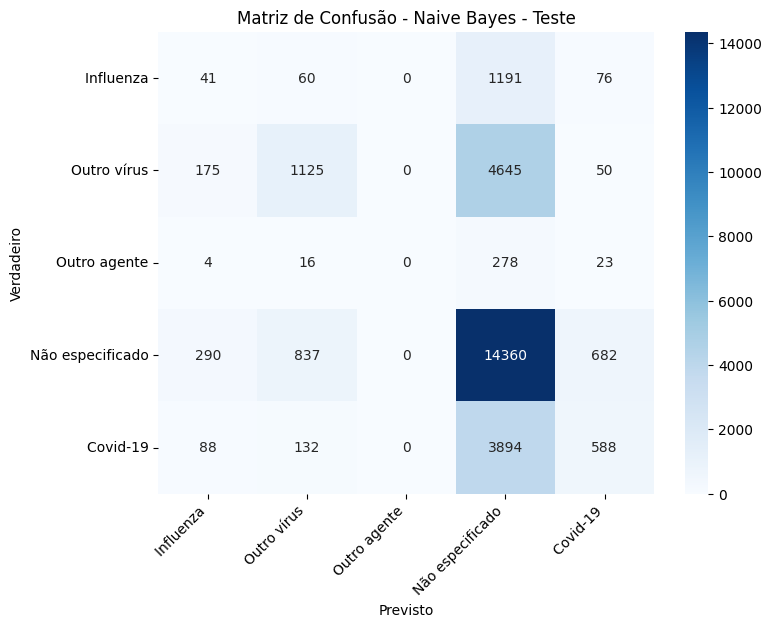

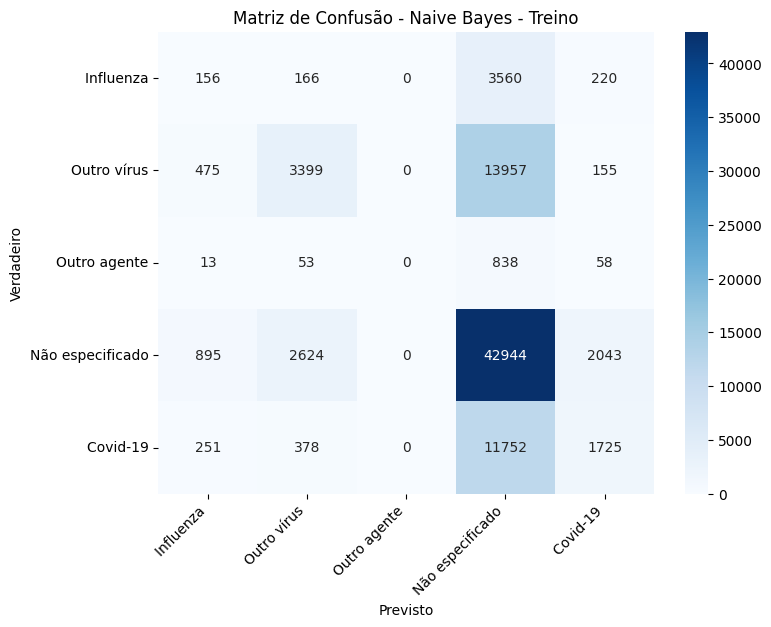

In [ ]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredNbTest = var_nb.predict(var_xTest)
var_yPredNbTrain = var_nb.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_nb_test = confusion_matrix(var_yTest, var_yPredNbTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_nb_train = confusion_matrix(var_yTrain, var_yPredNbTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()


# Metas TCC2

Aplicar novos modelos: SVM, Gradient Boosting, Árvores de Decisão e Florestas Aleatórias;​

Utilizar o Grid Search;​

Melhorar o pré-processamento dos dados da SRAG;

## SVM

In [ ]:
# Criação do classificador SVM.
var_svc = SVC(C=1, random_state=1, kernel='linear')

# Treinamento do modelo SVM com os dados de treinamento.
var_svc.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredSVCTest = var_svc.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredSVCTrain = var_svc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredSVCTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredSVCTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_svc.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_svc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


## Gradient Boosting

In [ ]:
# Criação do classificador Gradient Boosting.
var_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)

# Treinamento do modelo Gradient Boosting com os dados de treinamento.
var_gb.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=2024)

In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredGBTest = var_gb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredGBTrain = var_gb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredGBTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredGBTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_gb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_gb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 94.56487480301173%
Acurácia Treino: 94.84835749807382%

f1_score Test: 94.2600979785204%
f1_score Treino: 94.56369070862198%

Precisão Teste: 94.50300061476906%
Precisão Treino: 94.78262247960427%

Recall Teste: 94.56487480301173%
Recall Treino: 94.84835749807382%

ROC Teste: 97.61505786713393%
ROC Treino: 97.99172116910009%


## Árvores de Decisão

In [ ]:
# Criação do classificador Árvore de decisão.
var_tree = DecisionTreeClassifier( max_depth=3, random_state=2024)

# Treinamento do modelo Árvore de decisão com os dados de treinamento.
var_tree.fit(var_xTrain, var_yTrain)

DecisionTreeClassifier(max_depth=3, random_state=2024)

In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredTreeTest = var_tree.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredTreeTrain = var_tree.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredTreeTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredTreeTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_tree.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_tree.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 92.66678340045527%
Acurácia Treino: 92.77392542784432%

f1_score Test: 92.04786484399665%
f1_score Treino: 92.1578685894333%

Precisão Teste: 91.62532556357597%
Precisão Treino: 91.75156121718831%

Recall Teste: 92.66678340045527%
Recall Treino: 92.77392542784432%



c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Teste: 91.65518155744111%
ROC Treino: 91.3989983919947%


## Random Forest

In [ ]:
# Criação do Random forest.
var_rfc = RandomForestClassifier()

# Treinamento do modelo Random forest com os dados de treinamento.
var_rfc.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo Random forest
var_yPredRFCTest = var_rfc.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredRFCTrain = var_rfc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredRFCTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredRFCTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_rfc.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_rfc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 94.87655401856068%
Acurácia Treino: 99.99883262123228%

f1_score Test: 94.58866803780687%
f1_score Treino: 99.99883261676793%

Precisão Teste: 94.80257100733326%
Precisão Treino: 99.99883268613353%

Recall Teste: 94.87655401856068%
Recall Treino: 99.99883262123228%

ROC Teste: 97.4017066100947%
ROC Treino: 100.0%
